## Carregando dados no spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q df2gspread

     |████████████████████████████████| 56 kB 2.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 4.4.0 requires google-api-python-client>=1.7.8, but you have google-api-python-client 1.6.7 which is incompatible.
earthengine-api 0.1.309 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.6.7 which is incompatible.


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

from pyspark.sql import SparkSession

spark = SparkSession.builder \
  .master('local[*]') \
  .getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# carregando arquivos do hdfs

df = spark.read.csv("beneficios.csv", sep=';', header=True, encoding = 'latin1', inferSchema=True)

df.show(100)

+-----+----------+---------+--------------------+----+
|qt_sm|idade_conc|     sexo|             especie| cid|
+-----+----------+---------+--------------------+----+
|  1.0|        72|Masculino|Pensão por Morte ...|null|
|2.813|        67|Masculino|Aposentadoria por...|null|
|  1.0|        56| Feminino|Pensão por Morte ...|null|
|  1.0|        60|Masculino|Aposentadoria por...|null|
|  1.0|        66|Masculino|Amparo Social ao ...|null|
|1.111|        36|Masculino|Auxílio Doenca Pr...|null|
|  1.0|        63| Feminino|Aposentadoria por...|null|
|  1.0|        51| Feminino|Aposentadoria por...|null|
|  1.0|        60|Masculino|Aposentadoria por...|null|
|  1.0|        55| Feminino|Aposentadoria por...|null|
|  1.0|        60|Masculino|Aposentadoria por...|null|
|  1.0|        57| Feminino|Aposentadoria por...|null|
|  1.0|        56| Feminino|Aposentadoria por...|null|
|  1.0|        57|Masculino|Auxílio Doenca Pr...|S821|
|  1.0|        35| Feminino|Auxílio Doenca Pr...|C448|
|  1.0|   

# Selecionando colunas

In [ ]:
df.select('especie','sexo','idade_conc').show()

+--------------------+---------+----------+
|             especie|     sexo|idade_conc|
+--------------------+---------+----------+
|Pensão por Morte ...|Masculino|        72|
|Aposentadoria por...|Masculino|        67|
|Pensão por Morte ...| Feminino|        56|
|Aposentadoria por...|Masculino|        60|
|Amparo Social ao ...|Masculino|        66|
|Auxílio Doenca Pr...|Masculino|        36|
|Aposentadoria por...| Feminino|        63|
|Aposentadoria por...| Feminino|        51|
|Aposentadoria por...|Masculino|        60|
|Aposentadoria por...| Feminino|        55|
|Aposentadoria por...|Masculino|        60|
|Aposentadoria por...| Feminino|        57|
|Aposentadoria por...| Feminino|        56|
|Auxílio Doenca Pr...|Masculino|        57|
|Auxílio Doenca Pr...| Feminino|        35|
|Auxílio Doenca Pr...|Masculino|        45|
|Auxílio Doenca Pr...| Feminino|        30|
|Auxílio Doenca Pr...| Feminino|        48|
|Auxílio Doenca Pr...|Masculino|        57|
|Auxílio Doenca Pr...|Masculino|

## Filtrando dados

In [ ]:
# usando coluna do tipo boolean

df2 = df.filter(df.sexo == 'Feminino')

# usando uma expressão SQL

df3 = df.filter("sexo == 'Masculino'")

df2.show()
df3.show()

+-----+----------+--------+--------------------+----+
|qt_sm|idade_conc|    sexo|             especie| cid|
+-----+----------+--------+--------------------+----+
|  1.0|        56|Feminino|Pensão por Morte ...|null|
|  1.0|        63|Feminino|Aposentadoria por...|null|
|  1.0|        51|Feminino|Aposentadoria por...|null|
|  1.0|        55|Feminino|Aposentadoria por...|null|
|  1.0|        57|Feminino|Aposentadoria por...|null|
|  1.0|        56|Feminino|Aposentadoria por...|null|
|  1.0|        35|Feminino|Auxílio Doenca Pr...|C448|
|  1.0|        30|Feminino|Auxílio Doenca Pr...|I081|
|  1.0|        48|Feminino|Auxílio Doenca Pr...|M501|
|  1.0|        45|Feminino|Auxílio Doenca Pr...|M511|
|  1.0|        47|Feminino|Auxílio Doenca Pr...|M531|
|  1.0|        51|Feminino|Auxílio Doenca Pr...|M511|
|  1.0|        57|Feminino|Auxílio Doenca Pr...|null|
|  1.0|        30|Feminino|Auxílio Doenca Pr...|G402|
|  1.0|        13|Feminino|Pensão por Morte ...|null|
|  1.0|        55|Feminino|A

In [ ]:
# duas ou mais condições

df2 = df.filter((df.idade_conc > 70) & (df.sexo == 'Feminino'))
df2.show()

df3 = df.filter("idade_conc > 70 and sexo == 'Feminino'")
df3.show()

+-----+----------+--------+--------------------+----+
|qt_sm|idade_conc|    sexo|             especie| cid|
+-----+----------+--------+--------------------+----+
|  1.0|        89|Feminino|Pensão por Morte ...|null|
|  1.0|        77|Feminino|Pensão por Morte ...|null|
|  1.0|        82|Feminino|Pensão por Morte ...|null|
|  1.0|        78|Feminino|Pensão por Morte ...|null|
|  1.0|        75|Feminino|Pensão por Morte ...|null|
|  1.0|        75|Feminino|Pensão por Morte ...|null|
|  1.0|        72|Feminino|Pensão por Morte ...|null|
|  1.0|        75|Feminino|Pensão por Morte ...|null|
|  1.0|        72|Feminino|Pensão por Morte ...|null|
|  1.0|        77|Feminino|Pensão por Morte ...|null|
|4.613|        73|Feminino|Pensão por Morte ...|null|
|1.093|        80|Feminino|Pensão por Morte ...|null|
|  1.0|        75|Feminino|Pensão por Morte ...|null|
|  1.0|        72|Feminino|Pensão por Morte ...|null|
|2.294|        89|Feminino|Pensão por Morte ...|null|
|  1.0|        82|Feminino|P

In [ ]:
# utilizando a expressão "like"

df2 = df.filter(df.especie.like('%Acidente%'))
df2.show(truncate=False)

df3 = df.filter("especie like '%Acidente%'")
df3.show()

+-----+----------+---------+---------------------------------------+----+
|qt_sm|idade_conc|sexo     |especie                                |cid |
+-----+----------+---------+---------------------------------------+----+
|1.44 |30        |Masculino|Auxílio Doenca por Acidente do Trabalho|S623|
|1.0  |33        |Masculino|Auxílio Doenca por Acidente do Trabalho|S424|
|1.0  |35        |Masculino|Auxílio Doenca por Acidente do Trabalho|S421|
|1.151|28        |Masculino|Auxílio Doenca por Acidente do Trabalho|M235|
|1.0  |57        |Masculino|Auxílio Doenca por Acidente do Trabalho|null|
|3.657|34        |Masculino|Auxílio Doenca por Acidente do Trabalho|M255|
|2.54 |43        |Feminino |Auxílio Doenca por Acidente do Trabalho|M754|
|1.23 |37        |Masculino|Auxílio Doenca por Acidente do Trabalho|M659|
|3.986|46        |Masculino|Auxílio Doenca por Acidente do Trabalho|F321|
|1.189|32        |Feminino |Auxílio Doenca por Acidente do Trabalho|null|
|2.298|53        |Masculino|Auxílio Do

## Criando colunas derivadas

In [ ]:
df2 = df.select("especie", (df.qt_sm * 1200).alias("valor_renda"))
df2.show()

df3 = df.selectExpr("especie", "qt_sm * 1200 as valor_renda")
df3.show()


+--------------------+------------------+
|             especie|       valor_renda|
+--------------------+------------------+
|Pensão por Morte ...|            1200.0|
|Aposentadoria por...|3375.6000000000004|
|Pensão por Morte ...|            1200.0|
|Aposentadoria por...|            1200.0|
|Amparo Social ao ...|            1200.0|
|Auxílio Doenca Pr...|            1333.2|
|Aposentadoria por...|            1200.0|
|Aposentadoria por...|            1200.0|
|Aposentadoria por...|            1200.0|
|Aposentadoria por...|            1200.0|
|Aposentadoria por...|            1200.0|
|Aposentadoria por...|            1200.0|
|Aposentadoria por...|            1200.0|
|Auxílio Doenca Pr...|            1200.0|
|Auxílio Doenca Pr...|            1200.0|
|Auxílio Doenca Pr...|            1200.0|
|Auxílio Doenca Pr...|            1200.0|
|Auxílio Doenca Pr...|            1200.0|
|Auxílio Doenca Pr...|            1200.0|
|Auxílio Doenca Pr...|            1200.0|
+--------------------+------------

# Adicionado nova coluna

In [ ]:
df = df.withColumn("valor_renda", df.qt_sm * 1200)

df.show()

+-----+----------+---------+--------------------+----+------------------+
|qt_sm|idade_conc|     sexo|             especie| cid|       valor_renda|
+-----+----------+---------+--------------------+----+------------------+
|  1.0|        72|Masculino|Pensão por Morte ...|null|            1200.0|
|2.813|        67|Masculino|Aposentadoria por...|null|3375.6000000000004|
|  1.0|        56| Feminino|Pensão por Morte ...|null|            1200.0|
|  1.0|        60|Masculino|Aposentadoria por...|null|            1200.0|
|  1.0|        66|Masculino|Amparo Social ao ...|null|            1200.0|
|1.111|        36|Masculino|Auxílio Doenca Pr...|null|            1333.2|
|  1.0|        63| Feminino|Aposentadoria por...|null|            1200.0|
|  1.0|        51| Feminino|Aposentadoria por...|null|            1200.0|
|  1.0|        60|Masculino|Aposentadoria por...|null|            1200.0|
|  1.0|        55| Feminino|Aposentadoria por...|null|            1200.0|
|  1.0|        60|Masculino|Aposentado

In [ ]:
df_beneficios = df.withColumn('valor_renda', df.qt_sm * 1200)

df_beneficios.show()

+-----+----------+---------+--------------------+----+------------------+
|qt_sm|idade_conc|     sexo|             especie| cid|       valor_renda|
+-----+----------+---------+--------------------+----+------------------+
|  1.0|        72|Masculino|Pensão por Morte ...|null|            1200.0|
|2.813|        67|Masculino|Aposentadoria por...|null|3375.6000000000004|
|  1.0|        56| Feminino|Pensão por Morte ...|null|            1200.0|
|  1.0|        60|Masculino|Aposentadoria por...|null|            1200.0|
|  1.0|        66|Masculino|Amparo Social ao ...|null|            1200.0|
|1.111|        36|Masculino|Auxílio Doenca Pr...|null|            1333.2|
|  1.0|        63| Feminino|Aposentadoria por...|null|            1200.0|
|  1.0|        51| Feminino|Aposentadoria por...|null|            1200.0|
|  1.0|        60|Masculino|Aposentadoria por...|null|            1200.0|
|  1.0|        55| Feminino|Aposentadoria por...|null|            1200.0|
|  1.0|        60|Masculino|Aposentado

## Unindo tabelas (join)

In [ ]:
# carregando a tabela doencas

df_doencas = spark.read.csv("doencas.csv", sep=';', header=True, encoding = 'latin1')
df_doencas.show(truncate=False)

+-------------+----------------------------------------------------+-----------+----------+
|cid          |doenca                                              |causa_obito|restr_sexo|
+-------------+----------------------------------------------------+-----------+----------+
|NÃO INFORMADO|NÃO INFORMADO                                       |null       |null      |
|A000         |Cólera devida a Vibrio cholerae 01, biótipo cholerae|null       |null      |
|A001         |Cólera devida a Vibrio cholerae 01, biótipo El Tor  |null       |null      |
|A009         |Cólera não especificada                             |null       |null      |
|A010         |Febre tifóide                                       |null       |null      |
|A011         |Febre paratifóide A                                 |null       |null      |
|A012         |Febre paratifóide B                                 |null       |null      |
|A013         |Febre paratifóide C                                 |null       |

In [ ]:
# juntando as tabelas

df_beneficios_doencas = df_beneficios.join(df_doencas, 'cid', how='left')

df_beneficios_doencas.show()

+----+-----+----------+---------+--------------------+------------------+--------------------+-----------+----------+
| cid|qt_sm|idade_conc|     sexo|             especie|       valor_renda|              doenca|causa_obito|restr_sexo|
+----+-----+----------+---------+--------------------+------------------+--------------------+-----------+----------+
|null|  1.0|        72|Masculino|Pensão por Morte ...|            1200.0|                null|       null|      null|
|null|2.813|        67|Masculino|Aposentadoria por...|3375.6000000000004|                null|       null|      null|
|null|  1.0|        56| Feminino|Pensão por Morte ...|            1200.0|                null|       null|      null|
|null|  1.0|        60|Masculino|Aposentadoria por...|            1200.0|                null|       null|      null|
|null|  1.0|        66|Masculino|Amparo Social ao ...|            1200.0|                null|       null|      null|
|null|1.111|        36|Masculino|Auxílio Doenca Pr...|  

## Execício 01

Utilizendo os arquivos beneficios.csv e doencas.csv:
  1. Liste a idade, sexo e especie apenas para o sexo 'Masculino' cuja doença seja restrita ao sexo 'F'

In [ ]:
#df_select = df_beneficios_doencas.select('idade_conc','sexo','especie', 'doenca','restr_sexo')
df_fraudes = df_beneficios_doencas.filter((df_beneficios_doencas.sexo == 'Masculino') & (df_beneficios_doencas.restr_sexo == 'F'))
df_fraudes.show(truncate=False)

+----+-----+----------+---------+----------------------------------------+-----------+-------------------------------------------------------+-----------+----------+
|cid |qt_sm|idade_conc|sexo     |especie                                 |valor_renda|doenca                                                 |causa_obito|restr_sexo|
+----+-----+----------+---------+----------------------------------------+-----------+-------------------------------------------------------+-----------+----------+
|O200|1.0  |39        |Masculino|Auxílio Doenca Previdenciário           |1200.0     |Ameaça de aborto                                       |null       |F         |
|N750|1.0  |41        |Masculino|Auxílio Doenca Previdenciário           |1200.0     |Cisto da glândula de Bartholin                         |null       |F         |
|D280|1.0  |25        |Masculino|Auxílio Doenca Previdenciário           |1200.0     |Neoplasia benigna da vulva                             |null       |F         |
|C52

In [ ]:
# alteração condicional do valor da coluna
import pyspark.sql.functions as F

df_beneficios_doencas = df_beneficios_doencas.withColumn('restr_sexo',
                                 F.when(df_beneficios_doencas.restr_sexo == 'F', 'Feminino') \
                                 .when(df_beneficios_doencas.restr_sexo == 'M', 'Masculino') \
                                 .otherwise('Não especificado'))

df_beneficios_doencas.show()

In [ ]:
df_beneficios_doencas = df_beneficios_doencas.fillna("doenca","Não se aplica")

In [ ]:
# registrando o data frame como tabela temporaria
df_beneficios_doencas.registerTempTable("tmp_beneficios_doencas")

In [ ]:
# após registrar como tabela temporária, é possível usar linguagem SQL para acessar os dados

spark.sql("select sexo, mean(idade_conc) as media_idade from tmp_beneficios_doencas group by sexo").show()

+---------+------------------+
|     sexo|       media_idade|
+---------+------------------+
| Feminino| 46.54786297334116|
|Masculino|47.628080535002844|
+---------+------------------+



## Agrupando dados

In [ ]:
df_beneficios_doencas.groupby('especie','sexo').avg('qt_sm').show()



+--------------------+---------+------------------+
|             especie|     sexo|        avg(qt_sm)|
+--------------------+---------+------------------+
|    Auxílio Reclusão| Feminino|1.1982695652173914|
|Pensão por Morte ...| Feminino|            44.582|
|       Auxilio União|Masculino|0.5740000000000044|
|Auxílio Salario M...| Feminino|1.0713149663575117|
|Pensão Vitalícia ...| Feminino|             0.973|
|Pensão por Morte ...|Masculino|1.2387410855994074|
|Aposentadoria por...|Masculino|2.2067957369431266|
|Auxílio Acidente ...| Feminino| 0.706768472906404|
|Auxílio Suplement...|Masculino|             0.283|
|Amparo Social ao ...| Feminino|               1.0|
|Renda Mensal Vita...|Masculino|               1.0|
|Aposentadoria Esp...| Feminino|          3.110204|
|Pensão Vitalícia ...|Masculino|               1.0|
|Pensão por Morte ...| Feminino|            2.9555|
|Pensao Especial H...|Masculino|             1.973|
|Pensão por Morte ...|Masculino| 1.851333333333333|
|Aposentador

In [ ]:
#usando funções de agregação

import pyspark.sql.functions as F
df_beneficios_doencas.groupby('especie','sexo').agg(F.avg('idade_conc').alias('media_idade'), F.sum('qt_sm').alias('valor_total')).show()

+--------------------+---------+------------------+------------------+
|             especie|     sexo|       media_idade|       valor_total|
+--------------------+---------+------------------+------------------+
|    Auxílio Reclusão| Feminino|18.452173913043477|           413.403|
|Pensão por Morte ...| Feminino| 76.33333333333333|           133.746|
|       Auxilio União|Masculino| 19.73272490221643| 440.2580000000034|
|Auxílio Salario M...| Feminino|29.273746741831847| 35346.96599999974|
|Pensão Vitalícia ...| Feminino|              52.5|             1.946|
|Pensão por Morte ...|Masculino| 53.76933657813988|         11707.342|
|Aposentadoria por...|Masculino|57.090312152742705| 21845.07100000001|
|Auxílio Acidente ...| Feminino|40.995073891625616|143.47400000000002|
|Auxílio Suplement...|Masculino|              66.0|1.4149999999999998|
|Amparo Social ao ...| Feminino| 66.99639439744834|            7211.0|
|Renda Mensal Vita...|Masculino|              61.0|               1.0|
|Apose

## Gravando dados

In [ ]:
# gravando dados no sistema de arquivos

df_beneficios_doencas.repartition(1).write.csv('beneficios_doencas', mode='overwrite', header=True)

In [ ]:
# gravando dados como tabelas (hive)

df_beneficios_doencas.repartition(1).write.saveAsTable('beneficios_doencas', mode='overwrite', format="ORC")

In [ ]:
spark.sql('select * from beneficios_doencas').show()

+----+-----+----------+---------+--------------------+------------------+--------------------+-----------+----------------+
| cid|qt_sm|idade_conc|     sexo|             especie|       valor_renda|              doenca|causa_obito|      restr_sexo|
+----+-----+----------+---------+--------------------+------------------+--------------------+-----------+----------------+
|null|  1.0|        72|Masculino|Pensão por Morte ...|            1200.0|                null|       null|Não especificado|
|null|2.813|        67|Masculino|Aposentadoria por...|3375.6000000000004|                null|       null|Não especificado|
|null|  1.0|        56| Feminino|Pensão por Morte ...|            1200.0|                null|       null|Não especificado|
|null|  1.0|        60|Masculino|Aposentadoria por...|            1200.0|                null|       null|Não especificado|
|null|  1.0|        66|Masculino|Amparo Social ao ...|            1200.0|                null|       null|Não especificado|
|null|1.

## Exercicio 02

1. Crie uma tabela chamada top10_doencas que contenha a doença, o sexo, a média de idade e o total de beneficios para as 10 maiores doenças. Use o método limit(n) para obter as n primeiras linhas do DataFrame;

## Convertendo um spark DataFrame para o Pandas

df.toPandas()

*Ao converter o df para o pandas, a aplicação não mais contará com os recursos de distribuição e paralelismo do Spark/Hadoop


In [ ]:
pdf = df_beneficios_doencas.toPandas()

In [ ]:
pdf

,cid,qt_sm,idade_conc,sexo,especie,valor_renda,doenca,causa_obito,restr_sexo
0,None,1.000,72.0,Masculino,Pensão por Morte Previdenciária,1200.0,None,None,Não especificado
1,None,2.813,67.0,Masculino,Aposentadoria por Idade,3375.6,None,None,Não especificado
2,None,1.000,56.0,Feminino,Pensão por Morte Previdenciária,1200.0,None,None,Não especificado
3,None,1.000,60.0,Masculino,Aposentadoria por Idade,1200.0,None,None,Não especificado
4,None,1.000,66.0,Masculino,Amparo Social ao Idoso,1200.0,None,None,Não especificado
5,None,1.111,36.0,Masculino,Auxílio Doenca Previdenciário,1333.2,None,None,Não especificado
6,None,1.000,63.0,Feminino,Aposentadoria por Idade,1200.0,None,None,Não especificado
7,None,1.000,51.0,Feminino,Aposentadoria por Tempo de Contribuição,1200.0,None,None,Não especificado
8,None,1.000,60.0,Masculino,Aposentadoria por Idade,1200.0,None,None,Não especificado
9,None,1.000,55.0,Feminino,Aposentadoria por Idade,1200.0,None,None,Não especificado


## Exibindo dados em gráficos

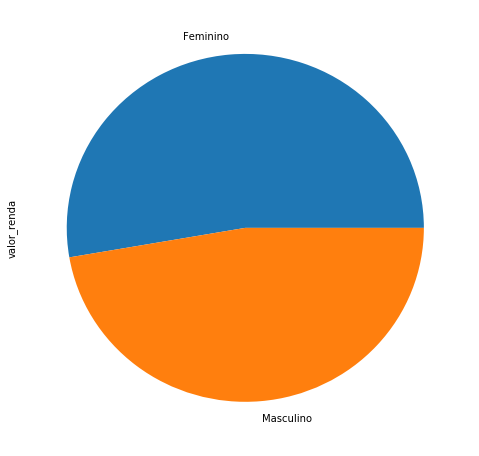

In [ ]:
pdf.groupby('sexo').valor_renda.sum().plot.pie(figsize=(8,8))

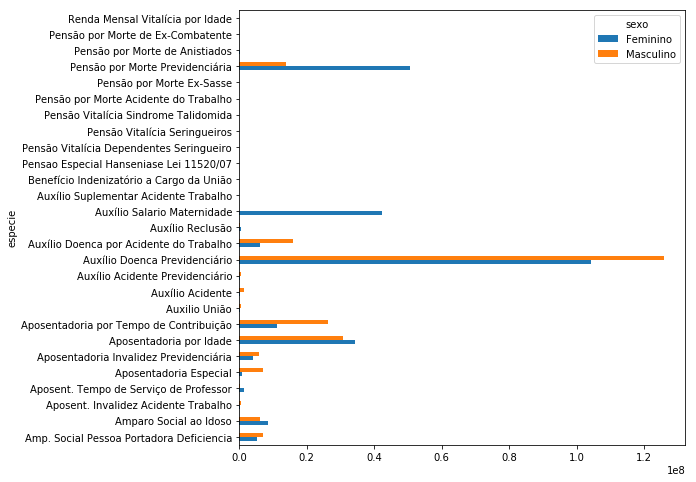

In [ ]:
pdf.groupby(['especie','sexo']).valor_renda.sum().unstack().plot.barh(figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbdb17af890>,
      dtype=object)

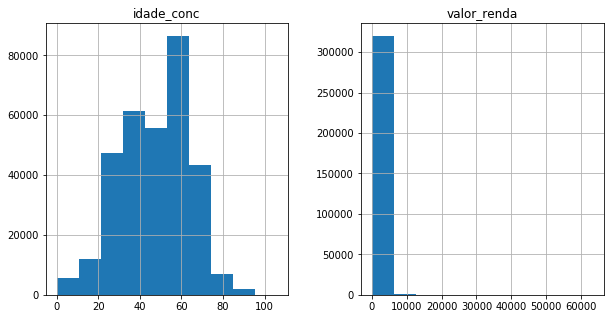

In [ ]:
pdf[['idade_conc','valor_renda']].hist(figsize=(10,5))